In [1]:
# import usual libraries for machine learing and data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# import naive bayes classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Prepare the data

In [2]:
import os

file_list = os.listdir("Dataset")
file_list = [file.replace(".csv", "") for file in file_list]

# put file names in file_list that have world splitTrain to file_list_train
file_list_train = [file for file in file_list if "splitTrain" in file]
file_list_test = [file for file in file_list if "splitTest" in file]

data_train = {}
for file in file_list_train:
    data_train[file.replace("splitTrain_", "").replace("splitTrain", "")] = pd.read_csv("Dataset/" + file + ".csv")

data_test = {}
for file in file_list_test:
    data_test[file.replace("splitTest_", "").replace("splitTest", "")] = pd.read_csv("Dataset/" + file + ".csv")


# Fungsi

In [3]:
# import f1 score metric from sklearn
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

# function to get dictionary of f1 score prediction for each data train and data test using KNeighborsClassifier
def get_score(data_train, data_test, modelNB):
    performanceData = {}
    for key in data_train:
        try:
          X_train = data_train[key].drop(["HeartDisease"], axis=1)
          y_train = data_train[key]["HeartDisease"]
          X_test = data_test[key].drop(["HeartDisease"], axis=1)
          y_test = data_test[key]["HeartDisease"]

          model = modelNB()
          model.fit(X_train, y_train)
          y_pred = model.predict(X_test)
        except:
          continue
        
        try:
          performanceData[key] = {'f1_score' : f1_score(y_test, y_pred)}
          performanceData[key]['accuracy'] = accuracy_score(y_test, y_pred)
          performanceData[key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
          performanceData[key]['roc_auc_score'] = roc_auc_score(y_test, y_pred)
          performanceData[key]['precision_score'] = precision_score(y_test, y_pred)
          performanceData[key]['recall_score'] = recall_score(y_test, y_pred)
        except:
          continue
        
    return performanceData

# function to cross validate the model using KFold
def cross_validate(data_train, modelNB):
    performanceData = {}
    for key in data_train:
      try:
        X_train = data_train[key].drop(["HeartDisease"], axis=1)
        y_train = data_train[key]["HeartDisease"]

        kf = KFold(n_splits=10, shuffle=True)
        scores = cross_val_score(modelNB(), X_train, y_train, cv=kf, scoring="f1_macro")
        performanceData[key] = scores.mean()
      except:
        continue
            
    return performanceData

In [4]:
data_train.keys()

dict_keys(['df_encoded_minmaxScaled', 'df_modifiedOutlier_encoded_minmaxScaled', 'df_deleteOutlier_encoded_minmaxScaled', 'df_DF_encoded_minmaxScaled', 'df_DF_modifiedOutlier_encoded_minmaxScaled', 'df_DF_deleteOutlier_encoded_minmaxScaled', 'df_DF_encoded_stdScaled_rounded', 'df_encoded_', 'df_DF_encoded_', 'df_modifiedOutlier_encoded_', 'df_DF_modifiedOutlier_encoded_', 'df_deleteOutlier_encoded_', 'df_DF_deleteOutlier_encoded_'])

# Comparing already made models

### Gaussian Naive Bayes

In [5]:
list_f1score_gnb = get_score(data_train, data_test, GaussianNB)

In [6]:
# create dataframe from list_f1score_gnb, sort by f1 score and then display it
df_f1score_gnb = pd.DataFrame.from_dict(list_f1score_gnb, orient="index")
df_f1score_gnb.sort_values(by=["f1_score", "accuracy"], ascending=[False, False], inplace=True)
df_f1score_gnb

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_encoded_,0.872727,0.847826,"[[90, 23], [19, 144]]",0.839948,0.862275,0.883436
df_DF_encoded_,0.865854,0.840580,"[[90, 23], [21, 142]]",0.833813,0.860606,0.871166
df_encoded_minmaxScaled,0.857939,0.815217,"[[71, 42], [9, 154]]",0.786552,0.785714,0.944785
df_deleteOutlier_encoded_minmaxScaled,0.857143,0.862559,"[[95, 15], [14, 87]]",0.862511,0.852941,0.861386
df_DF_encoded_minmaxScaled,0.854749,0.811594,"[[71, 42], [10, 153]]",0.783484,0.784615,0.938650
df_deleteOutlier_encoded_,0.851485,0.857820,"[[95, 15], [15, 86]]",0.857561,0.851485,0.851485
df_modifiedOutlier_encoded_,0.847619,0.855204,"[[100, 16], [16, 89]]",0.854844,0.847619,0.847619
df_DF_deleteOutlier_encoded_minmaxScaled,0.842640,0.853081,"[[97, 13], [18, 83]]",0.851800,0.864583,0.821782
df_modifiedOutlier_encoded_minmaxScaled,0.837209,0.841629,"[[96, 20], [15, 90]]",0.842365,0.818182,0.857143
df_DF_deleteOutlier_encoded_,0.836735,0.848341,"[[97, 13], [19, 82]]",0.846850,0.863158,0.811881


In [7]:
cross_validate_gnb = cross_validate(data_train, GaussianNB)

In [8]:
df_cross_validate_gnb = pd.DataFrame.from_dict(cross_validate_gnb, orient="index")
df_cross_validate_gnb.rename(columns={0: "f1"}, inplace=True)
df_cross_validate_gnb.sort_values(by=["f1"], ascending=False)
df_cross_validate_gnb


,f1
df_encoded_minmaxScaled,0.835802
df_modifiedOutlier_encoded_minmaxScaled,0.813540
df_deleteOutlier_encoded_minmaxScaled,0.815612
df_DF_encoded_minmaxScaled,0.833205
df_DF_modifiedOutlier_encoded_minmaxScaled,0.811906
df_DF_deleteOutlier_encoded_minmaxScaled,0.813048
df_DF_encoded_stdScaled_rounded,0.815598
df_encoded_,0.833298
df_DF_encoded_,0.825367
df_modifiedOutlier_encoded_,0.821034


### Multinomial Naive Bayes

In [9]:
list_f1score_mnb = get_score(data_train, data_test, MultinomialNB)

In [10]:
# create dataframe from list_f1score_mnb, sort by f1 score and then display it
df_f1score_mnb = pd.DataFrame.from_dict(list_f1score_mnb, orient="index")

# sort by all columns and display it
df_f1score_mnb.sort_values(by=["f1_score", "accuracy"], ascending=[False, False], inplace=True)
df_f1score_mnb

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_encoded_minmaxScaled,0.862974,0.829710,"[[81, 32], [15, 148]]",0.812395,0.822222,0.907975
df_deleteOutlier_encoded_minmaxScaled,0.857143,0.857820,"[[91, 19], [11, 90]]",0.859181,0.825688,0.891089
df_DF_encoded_minmaxScaled,0.846154,0.811594,"[[81, 32], [20, 143]]",0.797057,0.817143,0.877301
df_DF_deleteOutlier_encoded_minmaxScaled,0.834171,0.843602,"[[95, 15], [18, 83]]",0.842709,0.846939,0.821782
df_modifiedOutlier_encoded_minmaxScaled,0.791111,0.787330,"[[85, 31], [16, 89]]",0.790189,0.741667,0.847619
df_DF_modifiedOutlier_encoded_minmaxScaled,0.766520,0.760181,"[[81, 35], [18, 87]]",0.763424,0.713115,0.828571
df_DF_modifiedOutlier_encoded_,0.641350,0.615385,"[[60, 56], [29, 76]]",0.620525,0.575758,0.723810
df_modifiedOutlier_encoded_,0.638655,0.610860,"[[59, 57], [29, 76]]",0.616215,0.571429,0.723810
df_deleteOutlier_encoded_,0.605263,0.573460,"[[52, 58], [32, 69]]",0.577948,0.543307,0.683168
df_DF_deleteOutlier_encoded_,0.605263,0.573460,"[[52, 58], [32, 69]]",0.577948,0.543307,0.683168


In [11]:
cross_validate_mnb = cross_validate(data_train, MultinomialNB)
df_cross_validate_mnb = pd.DataFrame.from_dict(cross_validate_mnb, orient="index")
df_cross_validate_mnb.rename(columns={0: "f1"}, inplace=True)
df_cross_validate_mnb

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/sklearn/naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/sklearn/naive_bayes.py", line 863, in _count
    check_non_negative(X, "Multinom

,f1
df_encoded_minmaxScaled,0.800001
df_modifiedOutlier_encoded_minmaxScaled,0.797928
df_deleteOutlier_encoded_minmaxScaled,0.777963
df_DF_encoded_minmaxScaled,0.766334
df_DF_modifiedOutlier_encoded_minmaxScaled,0.781720
df_DF_deleteOutlier_encoded_minmaxScaled,0.777568
df_DF_encoded_stdScaled_rounded,NaN
df_encoded_,NaN
df_DF_encoded_,NaN
df_modifiedOutlier_encoded_,0.593662


# Model from scratch

In [12]:
from collections import Counter

class GaussianNB_Classifier:
    def get_prior(self, data):
        """
        data : list data
        """
        n_data = len(data)
        prior = Counter(data)
        for key in prior.keys():
            prior[key] = prior[key] / n_data
        return prior

    def get_mean_and_std(self, data):
        list_columns = data.columns[:-1]
        class_column_name = data.columns[-1]
        list_class = set(data[class_column_name])

        mean = {}
        std = {}

        for column in list_columns:
            for a_class in list_class:
                mean[(column, a_class)] = np.mean(
                    data.loc[data[class_column_name] == a_class][column])
                std[(column, a_class)] = np.std(
                    data.loc[data[class_column_name] == a_class][column])

        return mean, std

    def get_gaussian_likelihood(self, data, mean, std):
        res = (1/np.sqrt(2*np.pi*(std**2)))
        res *= np.exp((-1*((data-mean)**2))/(2*(std**2)))

        return res

    def training_gaussianNB(self, X, y):
        X = X.join(y)
        prior = self.get_prior(y)
        mean, std = self.get_mean_and_std(X)

        list_class = set(y)
        list_columns = X.columns[:-1]

        model = {}
        model['prior'] = prior
        model['mean'] = mean
        model['std'] = std
        model['class'] = list_class
        model['columns'] = list_columns

        return model

    def fit(self, X, y):
        self.model = self.training_gaussianNB(X, y)

    def get_single_prediction(self, data):
        prior = self.model['prior']
        mean = self.model['mean']
        std = self.model['std']
        list_class = self.model['class']
        list_columns = self.model['columns']
        
        posterior = dict.fromkeys(list_class, 1)

        for a_class in list_class:
            for column in list_columns:    
                posterior[a_class] *= self.get_gaussian_likelihood(
                    data[column], mean[(column, a_class)], std[(column, a_class)])
            posterior[a_class] *= prior[a_class]

        kelas_uji = max(posterior, key=posterior.get)
        return kelas_uji

    def predict(self, X_test):
        y_pred = []
        for index, row in X_test.iterrows():
            y_pred.append(self.get_single_prediction(row))
        return np.array(y_pred)


In [13]:
list_gnb_scratch = get_score(data_train, data_test, GaussianNB_Classifier)
df_gnb_scratch = pd.DataFrame.from_dict(list_gnb_scratch, orient="index")
df_gnb_scratch.sort_values(by=["f1_score", "accuracy"], ascending=[False, False], inplace=True)
df_gnb_scratch

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_encoded_,0.872727,0.847826,"[[90, 23], [19, 144]]",0.839948,0.862275,0.883436
df_DF_encoded_,0.865854,0.840580,"[[90, 23], [21, 142]]",0.833813,0.860606,0.871166
df_encoded_minmaxScaled,0.857939,0.815217,"[[71, 42], [9, 154]]",0.786552,0.785714,0.944785
df_deleteOutlier_encoded_minmaxScaled,0.857143,0.862559,"[[95, 15], [14, 87]]",0.862511,0.852941,0.861386
df_DF_encoded_minmaxScaled,0.854749,0.811594,"[[71, 42], [10, 153]]",0.783484,0.784615,0.938650
df_deleteOutlier_encoded_,0.851485,0.857820,"[[95, 15], [15, 86]]",0.857561,0.851485,0.851485
df_modifiedOutlier_encoded_,0.847619,0.855204,"[[100, 16], [16, 89]]",0.854844,0.847619,0.847619
df_DF_deleteOutlier_encoded_minmaxScaled,0.842640,0.853081,"[[97, 13], [18, 83]]",0.851800,0.864583,0.821782
df_modifiedOutlier_encoded_minmaxScaled,0.837209,0.841629,"[[96, 20], [15, 90]]",0.842365,0.818182,0.857143
df_DF_deleteOutlier_encoded_,0.836735,0.848341,"[[97, 13], [19, 82]]",0.846850,0.863158,0.811881


<AxesSubplot:>

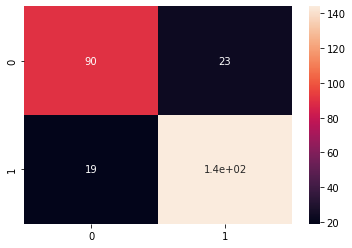

In [21]:
# plot confusion matrix using seaborn
sns.heatmap(df_gnb_scratch.loc['df_encoded_']['confusion_matrix'] ,annot=True)


In [14]:

X = data_train['df_encoded_'].drop(["HeartDisease"], axis=1)
y = data_train['df_encoded_']["HeartDisease"]
kf = KFold(n_splits=5, random_state=0, shuffle=True)
model = GaussianNB_Classifier()
scoresAccuracy = []
scoresRecall = []
scoresPrecision = []
scoresF1 = []
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    Y_train, Y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    x_train = (x_train-np.min(x_train)) / \
        (np.max(x_train)-np.min(x_train)).values
    x_test = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)).values
    model.fit(x_train, Y_train)
    y_pred_test = model.predict(x_test)
    test_data_accuracy = accuracy_score(Y_test, y_pred_test)
    test_data_recall = recall_score(Y_test, y_pred_test)
    test_data_precision = precision_score(Y_test, y_pred_test)
    test_data_f1_score = f1_score(Y_test, y_pred_test)
    scoresAccuracy.append(test_data_accuracy)
    scoresRecall.append(test_data_recall)
    scoresPrecision.append(test_data_precision)
    scoresF1.append(test_data_f1_score)

print('Accuracy Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresAccuracy)*100, np.std(scoresAccuracy)*100))
print('Recall Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresRecall)*100, np.std(scoresRecall)*100))
print('Precision Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresPrecision)*100, np.std(scoresPrecision)*100))
print('F1 Scores Test Data: %.2f (%.2f)' %
      (np.mean(scoresF1)*100, np.std(scoresF1)*100))


/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tridi/a

Accuracy Scores Test Data: 81.77 (1.94)
Recall Scores Test Data: 90.56 (5.61)
Precision Scores Test Data: 78.32 (2.43)
F1 Scores Test Data: 83.93 (3.33)
